# 🧹 02 - Pré-processamento dos Dados
Este notebook realiza a limpeza, transformação e preparação dos dados para o modelo de previsão de inadimplência.

In [1]:
#Importação de pacotes
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
import pyodbc as sql # Substituição de pymssql para conexão SQL

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [3]:
# importando os dados para um arquivo excel
df_original = pd.read_excel('C:/Users/leojo/Desktop/PROJETO_INADIMPLENCIA_COMPLETO/data\processed/df_original_pt_1.xlsx')


In [4]:
# Visualizando algumas medidas estatisticas
df_original.describe()

,NUMERO_CONTRATO,DATA_ASSINATURA_CONTRATO,TAXA_AO_ANO,PZ_FINANCIAMENTO,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO
count,10415.000000,10415,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10411.000000,10415.000000,10415.000000,10415.000000,10415.000000,1.041500e+04,10415.000000,10414.000000
mean,95569.356889,2016-10-25 14:45:00.950552064,17.271483,114.242535,5620.259241,16.716179,664.389438,35.946711,44528.545631,27.667115,6.115699,79.133845,28.841863,3.255909e+05,3617.341097,40.789418
min,32709.000000,2012-01-10 00:00:00,7.000000,48.000000,1800.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,2.932700e+04,185.740000,0.000000
25%,75868.500000,2014-06-13 00:00:00,16.000000,72.000000,1800.000000,0.000000,0.000000,11.000000,8675.445000,7.000000,0.000000,0.000000,0.000000,2.100000e+05,2467.755000,31.250000
50%,79111.000000,2016-09-23 00:00:00,17.000000,72.000000,7800.000000,0.000000,0.000000,33.000000,24345.600000,22.000000,1.000000,8.000000,4.000000,2.800000e+05,3470.590000,39.000000
75%,136637.500000,2018-12-28 00:00:00,19.000000,180.000000,7800.000000,22.000000,1005.500000,54.000000,46787.290000,42.000000,3.000000,62.000000,22.000000,3.929738e+05,4930.245000,49.000000
max,155890.000000,2022-11-14 00:00:00,25.500000,240.000000,9800.000000,178.000000,5655.000000,167.000000,714499.740000,136.000000,5465.000000,5710.000000,5480.000000,1.400000e+06,14410.000000,118.000000
std,34561.658949,NaN,2.566596,64.330109,2930.301113,30.706681,1181.352716,28.384415,65640.970502,25.153443,82.908021,334.871089,137.395374,1.774775e+05,1932.714754,12.390906


In [5]:
print('Maior Valor Financiado:', df_original['VALOR_FINANCIAMENTO'].max())
print('Menor Valor Financiado:', df_original['VALOR_FINANCIAMENTO'].min())

Maior Valor Financiado: 1400000.0
Menor Valor Financiado: 29327.0


In [6]:
# A variavel alvo precisará ser balanceada na etapa de pré-processamento
df_original.groupby(['INADIMPLENTE_COBRANCA']).size()

INADIMPLENTE_COBRANCA
NAO    2377
SIM    8038
dtype: int64

In [7]:
# Aqui não precisaremos alterar nada
df_original.groupby(['PZ_FINANCIAMENTO']).size()

PZ_FINANCIAMENTO
48      343
72     6122
100     939
160       2
180     765
194       2
200     558
220     774
240     910
dtype: int64

In [ ]:
# Aqui não precisaremos fazer nenhum tratamento
df_original.groupby(['RENDA_MENSAL_CLIENTE']).size()

RENDA_MENSAL_CLIENTE
1800    3512
3800      33
4800     416
5800    1039
6800     130
7800    4306
9800     979
dtype: int64

In [9]:
# Observe que temos uma variedade muito grande de valor financiado, neste caso devemos criar um range de valores
df_original.groupby(['VALOR_FINANCIAMENTO']).size()

VALOR_FINANCIAMENTO
29327.00         1
31421.00         3
39915.00         7
42574.00         7
45396.25         1
45789.00        18
46088.00         1
47574.00         1
55366.00         2
58658.00         1
60991.00         5
65054.00         3
66195.00         1
67439.00         1
67769.00         1
69967.00         3
71559.00        11
72284.00         1
73767.00         9
74050.00         1
75387.00         2
76700.00         2
77743.00         2
78714.00         2
79511.00         1
79706.00         1
80602.00         1
81323.00         4
82688.00         1
83409.00         1
83765.00         1
85303.00         1
85516.00         1
85870.00        15
86581.00         3
86741.00         6
86948.00         1
88748.00         3
92039.00         7
92116.00         2
92673.00         1
93027.00         1
93292.00        15
93378.00         5
95134.00         2
95677.00         1
96569.00         1
97336.00         1
97930.00         1
98949.00         2
99293.00         1
99594.00   

- Analise Exploratória (Variáveis Categóricas)
- Tratamento de Valores Missing
- Engenharia de Atributos

In [10]:
# Variavel DATA_ASSINATURA_CONTRATO possui 1 registro
# Variavel VL_TOTAL_PC_PAGAS possui 4 registros

# Excluindo os registros NA (5 registros)
df_original.dropna(inplace=True)

In [11]:
# Criando faixa de prazos para utilizarmos no modelo preditivo
bins = [-100, 120, 180, 240]
labels = ['Até 120 Meses', '121 até 180 Meses', '181 até 240 Meses']
df_original['FAIXA_PRAZO_FINANCIAMENTO'] = pd.cut(df_original['PZ_FINANCIAMENTO'], bins=bins, labels=labels)
pd.value_counts(df_original.FAIXA_PRAZO_FINANCIAMENTO)

FAIXA_PRAZO_FINANCIAMENTO
Até 120 Meses        7402
181 até 240 Meses    2241
121 até 180 Meses     767
Name: count, dtype: int64

In [12]:
# Criando faixa salarial para utilizarmos no modelo preditivo
bins = [-100, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 9000000000]
labels = ['Até 100 mil', '101 até 200 mil', '201 até 300 mil', '301 até 400 mil', '401 até 500 mil', 
          '501 até 750 mil', 'De 751 até 1.000.000','Mais de 1.000.000']
df_original['FAIXA_VALOR_FINANCIADO'] = pd.cut(df_original['VALOR_FINANCIAMENTO'], bins=bins, labels=labels)
pd.value_counts(df_original.FAIXA_VALOR_FINANCIADO)

FAIXA_VALOR_FINANCIADO
201 até 300 mil         3949
301 até 400 mil         2098
101 até 200 mil         1823
401 até 500 mil         1128
501 até 750 mil          915
De 751 até 1.000.000     236
Até 100 mil              167
Mais de 1.000.000         94
Name: count, dtype: int64

In [13]:
# Podemos retirar a variável TIPO FINANCIAMENTO como vimos anteriormente
# Devemos retirar a variável VALOR_FINANCIAMENTO pois criamos uma variavel de faixa de valores para ela.
# Devemos retirar a variável PRAZO_FINANCIAMENTO pois criamos uma variavel de faixa de meses para ela.
# Podemos retirar a variável DATA_ASSINATURA_CONTRATO
# Podemos retirar a variável NUMERO_CONTRATO

colunas = ['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE','RENDA_MENSAL_CLIENTE', 
           'QT_PC_ATRASO', 'QT_DIAS_PRIM_PC_ATRASO','QT_TOTAL_PC_PAGAS',
           'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA','QT_DIAS_MIN_ATRASO',
           'QT_DIAS_MAX_ATRASO', 'QT_DIAS_MEDIA_ATRASO','VALOR_PARCELA',
           'IDADE_DATA_ASSINATURA_CONTRATO', 'FAIXA_VALOR_FINANCIADO',
           'FAIXA_PRAZO_FINANCIAMENTO','INADIMPLENTE_COBRANCA']

df_dados = pd.DataFrame(df_original, columns=colunas)

In [14]:
df_dados.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO,FAIXA_PRAZO_FINANCIAMENTO,INADIMPLENTE_COBRANCA
0,15.0,FORTALEZA,CE,4800,0,0,97,120078.00,72,3,506,152,471.29,70.0,Até 100 mil,121 até 180 Meses,SIM
1,15.0,SAO PAULO,SP,6800,0,0,103,156759.47,42,1,349,93,1858.69,28.0,301 até 400 mil,181 até 240 Meses,SIM
2,18.0,SAO PAULO,SP,6800,0,0,98,277125.05,83,1,151,39,3123.57,60.0,501 até 750 mil,181 até 240 Meses,SIM
3,15.0,SAO PAULO,SP,6800,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,401 até 500 mil,181 até 240 Meses,SIM
4,17.0,SAO PAULO,SP,6800,0,0,71,344249.83,57,1,36,10,4224.03,63.0,501 até 750 mil,181 até 240 Meses,SIM


In [15]:
df_dados.shape

(10410, 17)

In [16]:
df_dados.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TAXA_AO_ANO                     10410 non-null  float64 
 1   CIDADE_CLIENTE                  10410 non-null  object  
 2   ESTADO_CLIENTE                  10410 non-null  object  
 3   RENDA_MENSAL_CLIENTE            10410 non-null  int64   
 4   QT_PC_ATRASO                    10410 non-null  int64   
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64   
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64   
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64 
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64   
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64   
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64   
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64   
 12  VALOR_PARCELA          

In [17]:
df_dados.isnull().sum()

TAXA_AO_ANO                       0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 0
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    0
FAIXA_VALOR_FINANCIADO            0
FAIXA_PRAZO_FINANCIAMENTO         0
INADIMPLENTE_COBRANCA             0
dtype: int64

### Analise Exploratória - Variáveis Categóricas
<br>
Nesta analise temos 2 objetivos:<br>
1 - Conhecer como a variável alvo (INADIMPLENTE_COBRANCA) está relacionada com as outras variáveis.<br>
2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

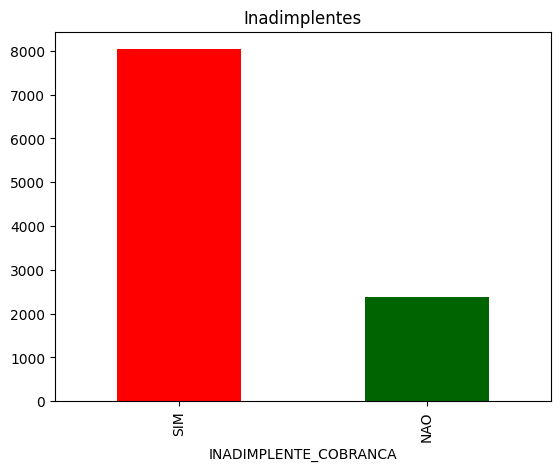

In [19]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais cotas como INADIMPLENTE
#dessa forma, precisaremos balancear o dataset mais adiante.
df_dados.INADIMPLENTE_COBRANCA.value_counts().plot(kind='bar', title='Inadimplentes',color = ['#FF0000', '#006400']);

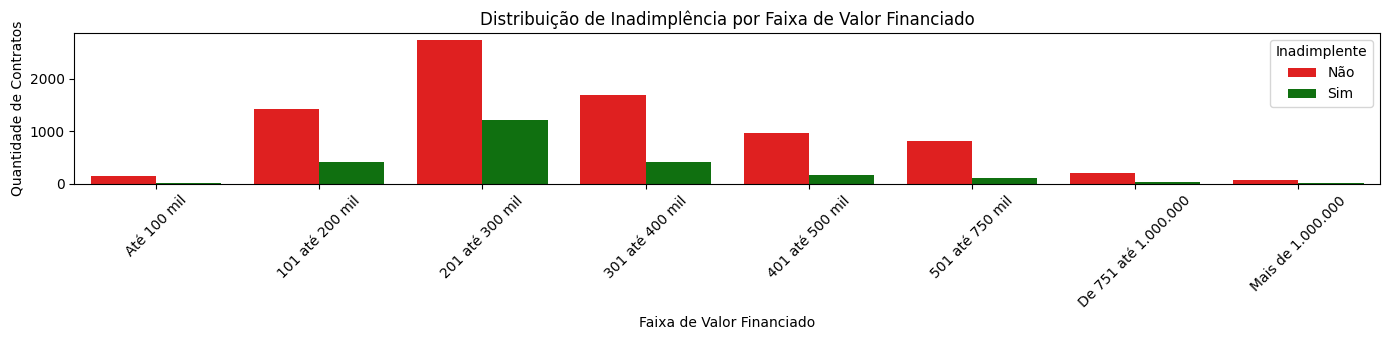

In [24]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

# Ajustes visuais do gráfico
plt.rcParams["figure.figsize"] = [14.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plotando a distribuição de inadimplência por faixa de valor financiado

sns.countplot(
    data=df_dados,
    x="FAIXA_VALOR_FINANCIADO",
    hue="INADIMPLENTE_COBRANCA",
    palette={"SIM": "red", "NAO": "green"}
)

# Título e ajustes
plt.title("Distribuição de Inadimplência por Faixa de Valor Financiado")
plt.xlabel("Faixa de Valor Financiado")
plt.ylabel("Quantidade de Contratos")
plt.xticks(rotation=45)
plt.legend(title="Inadimplente", labels=["Não", "Sim"])
plt.show()

['SIM' 'NAO']


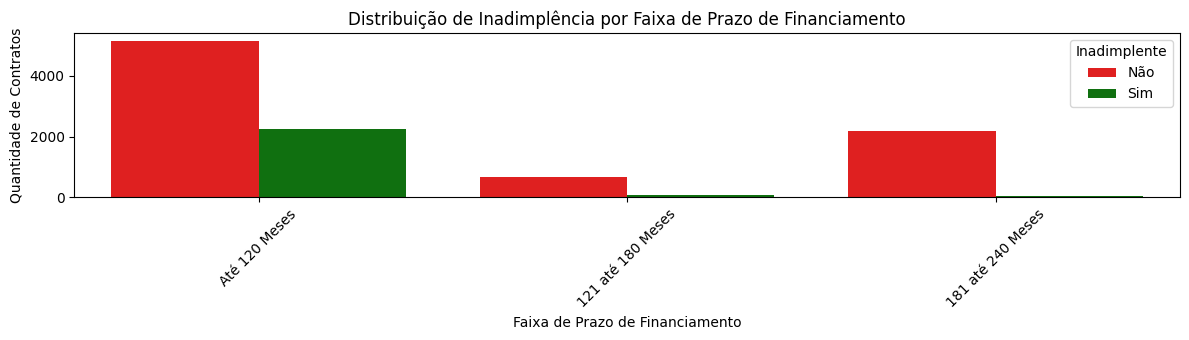

In [27]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

# Ajustes visuais do gráfico
plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Verificar os valores únicos (opcional para checagem)
print(df_dados["INADIMPLENTE_COBRANCA"].unique())

# Gráfico com cores personalizadas para cada classe
sns.countplot(
    data=df_dados,
    x="FAIXA_PRAZO_FINANCIAMENTO",
    hue="INADIMPLENTE_COBRANCA",
    palette={"SIM": "red", "NAO": "green"}
)

# Títulos e ajustes
plt.title("Distribuição de Inadimplência por Faixa de Prazo de Financiamento")
plt.xlabel("Faixa de Prazo de Financiamento")
plt.ylabel("Quantidade de Contratos")
plt.xticks(rotation=45)
plt.legend(title="Inadimplente", labels=["Não", "Sim"])
plt.show()

In [28]:
# exportando os dados para um arquivo excel
df_dados.to_excel('C:/Users/leojo/Desktop/PROJETO_INADIMPLENCIA_COMPLETO/data\processed/df_dados_pt_2.xlsx', index=False)